#  Salary_hike -> Build a prediction model for Salary_hike
 

In [1]:
# Salary_hike -> Build a prediction model for Salary_hik

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# #EDA and Data Visualization


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataset.columns# idenfity the features

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
len(dataset.columns) # identify the number of features

2

In [8]:
dataset.dtypes # identify the datatypes of the features

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
dataset.shape # identify the size of of the dataset

(30, 2)

In [10]:
dataset.isnull().values.any() # checking if dataset has empty cells

False

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Text(0.5, 1.0, "Violin plot of 'Salary'")

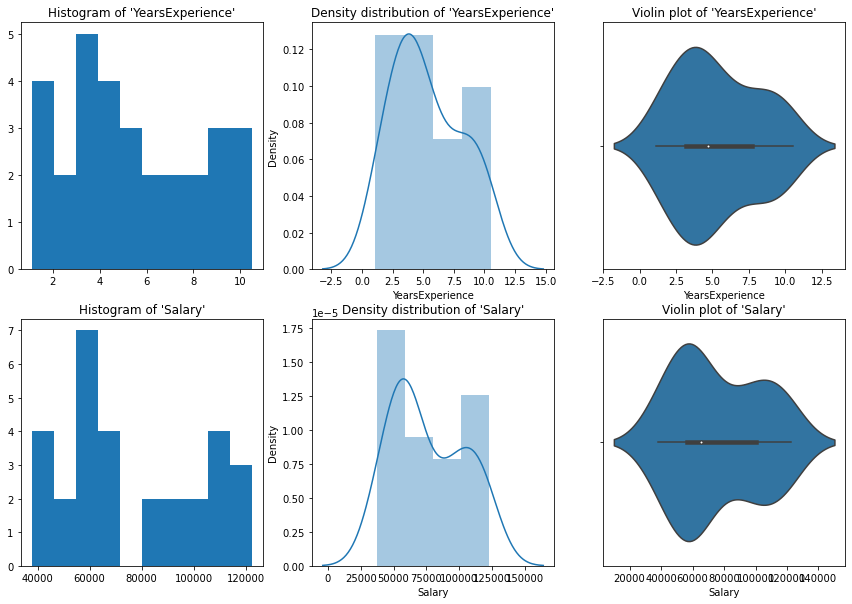

In [11]:
# Histogram
# We can use either plt.hist or sns.histplot
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['YearsExperience'], density=False)
plt.title("Histogram of 'YearsExperience'")
plt.subplot(2,4,5)
plt.hist(dataset['Salary'], density=False)
plt.title("Histogram of 'Salary'")


# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['YearsExperience'], kde=True)
plt.title("Density distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(dataset['Salary'], kde=True)
plt.title("Density distribution of 'Salary'")



# boxplot or violin plot
# A violin plot is a method of plotting numeric data. It is similar to a box plot, 
# with the addition of a rotated kernel density plot on each side
plt.subplot(2,4,3)
# plt.boxplot(df['YearsExperience'])
sns.violinplot(dataset['YearsExperience'])
# plt.title("Boxlpot of 'YearsExperience'")
plt.title("Violin plot of 'YearsExperience'")
plt.subplot(2,4,7)
# plt.boxplot(df['Salary'])
sns.violinplot(dataset['Salary'])
# plt.title("Boxlpot of 'Salary'")
plt.title("Violin plot of 'Salary'")



Text(0.5, 1.0, 'Joint plot using sns')

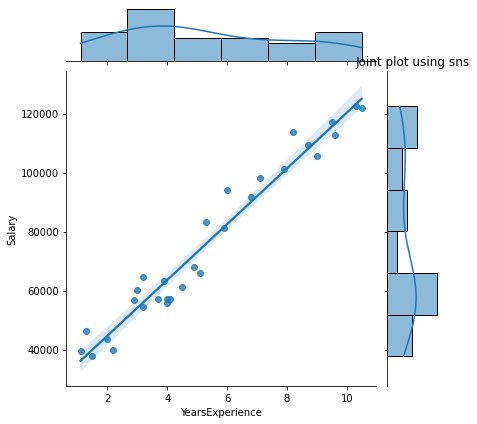

In [12]:
# Joint plot
sns.jointplot(x = "YearsExperience", y = "Salary", kind = "reg", data = dataset)
plt.title("Joint plot using sns")
# kind can be hex, kde, scatter, reg, hist. When kind='reg' it shows the best fit line.

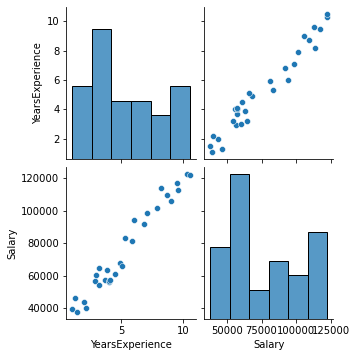

In [13]:
sns.pairplot(dataset)

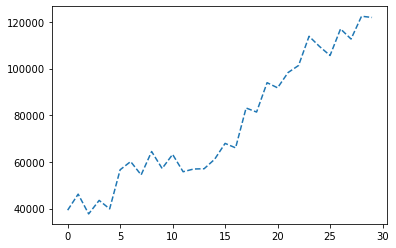

In [14]:
plt.plot(dataset.Salary,linestyle='dashed',)

Text(0.5, 1.0, 'Heatmap using matplotlib')

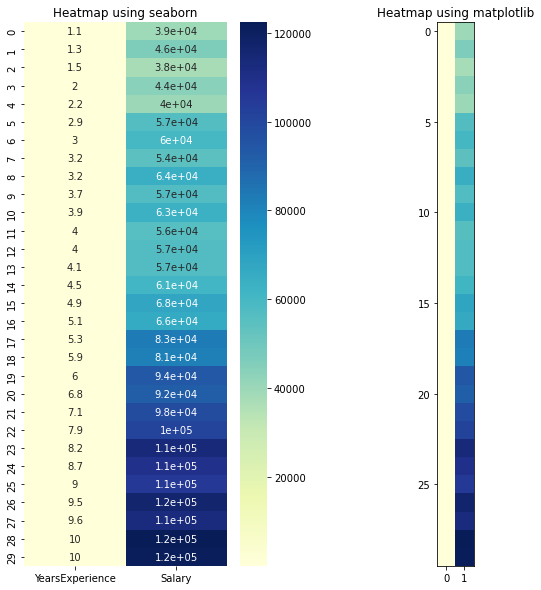

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.heatmap(data=dataset, cmap="YlGnBu", annot = True)
plt.title("Heatmap using seaborn")
plt.subplot(1, 2, 2)
plt.imshow(dataset, cmap ="YlGnBu")
plt.title("Heatmap using matplotlib")

Correlation: n                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


<AxesSubplot:>

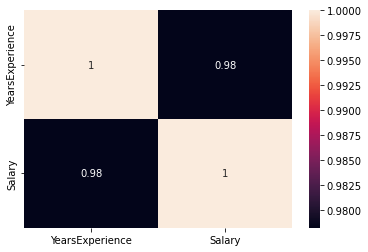

In [16]:
print("Correlation: "+ 'n', dataset.corr()) # 0.978 which is high positive correlation
# Draw a heatmap for correlation matrix
plt.subplot(1,1,1)
sns.heatmap(dataset.corr(), annot=True)

Text(0.5, 1.0, 'Line Plot')

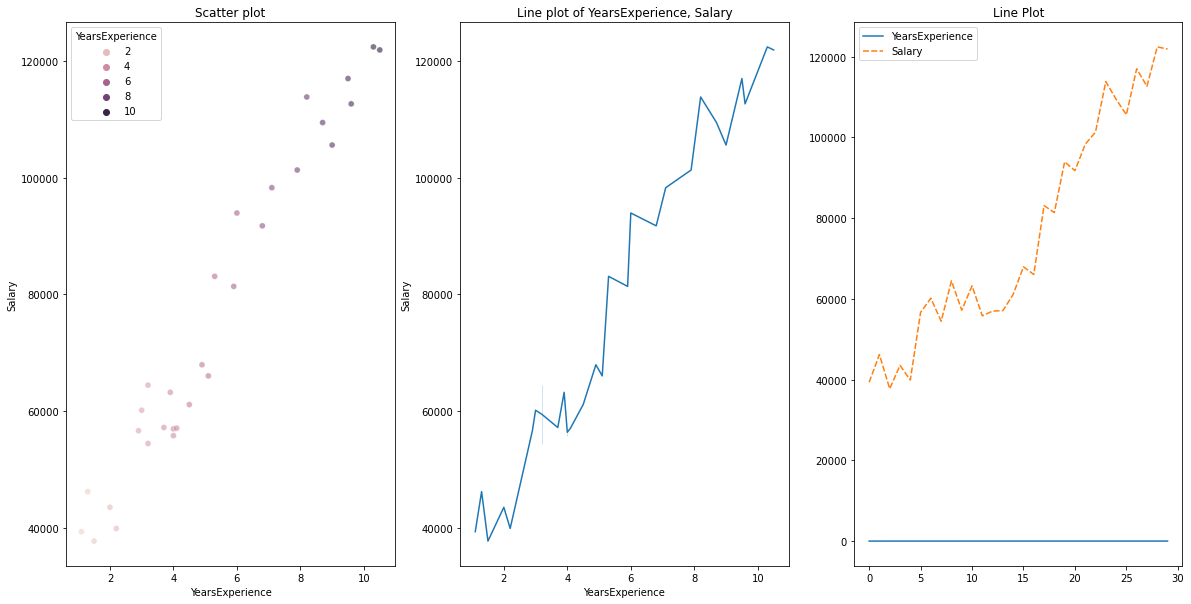

In [17]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=dataset, x="YearsExperience", y="Salary", hue="YearsExperience", alpha=0.6)
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(data=dataset, x="YearsExperience", y="Salary")
plt.title("Line plot of YearsExperience, Salary")
plt.subplot(1,3,3)
sns.lineplot(data=dataset)
plt.title('Line Plot')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

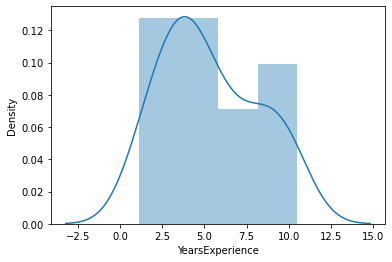

In [18]:
sns.distplot(dataset['YearsExperience'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

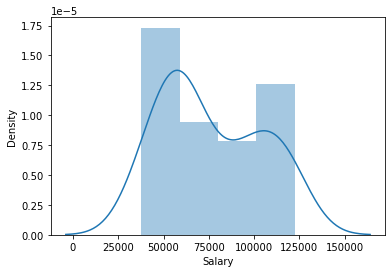

In [19]:
sns.distplot(dataset['Salary'])


# coloumn renaiming 

In [20]:
dataset=dataset.rename({'YearsExperience':'Exp', 'Salary':'Sal'},axis=1)
dataset


,Exp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [21]:
dataset.corr()

,Exp,Sal
Exp,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:xlabel='Exp', ylabel='Sal'>

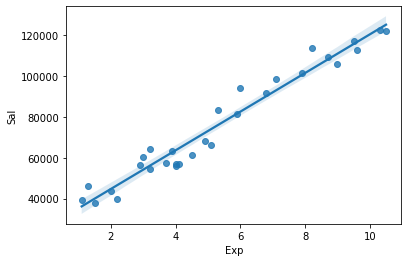

In [22]:
sns.regplot(x=dataset['Exp'],y=dataset['Sal'])


# Model building

In [23]:
model=smf.ols("Sal~Exp",data=dataset).fit()

In [24]:
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [25]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    11.346940
 Exp          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 Exp          1.143068e-20
 dtype: float64)

In [26]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [27]:
# Manual prediction for say 5 years experince
Experience = (25792.200) + (9449.96)*(5)
Experience

73042.0

In [28]:
# Automatic Prediction for say 5, 7 expeience
new_data=pd.Series([5,7])
new_data

0    5
1    7
dtype: int64

In [29]:
data_pred=pd.DataFrame(new_data,columns=['Exp'])
data_pred

,Exp
0,5
1,7


In [30]:
model.predict(data_pred)

0    73042.011806
1    91941.936449
dtype: float64